In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
import pathlib

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [8]:
saved_model_dir = 'saved_model/1' 

In [9]:
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

In [10]:
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

1080

In [12]:
interpreter = tf.lite.Interpreter(model_path=str(tflite_model_file))
interpreter.allocate_tensors()

In [13]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [15]:
import tensorflow as tf

model = tf.saved_model.load(saved_model_dir)

In [16]:
# Test the TensorFlow Lite model on random input data.
input_shape = input_details[0]['shape']
inputs, outputs = [], []
for _ in range(100):
  input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
  interpreter.set_tensor(input_details[0]['index'], input_data)

  interpreter.invoke()
  tflite_results = interpreter.get_tensor(output_details[0]['index'])

  # Test the TensorFlow model on random input data.
  tf_results = model(tf.constant(input_data))
  output_data = np.array(tf_results)
  inputs.append(input_data[0][0])
  outputs.append(output_data[0][0])

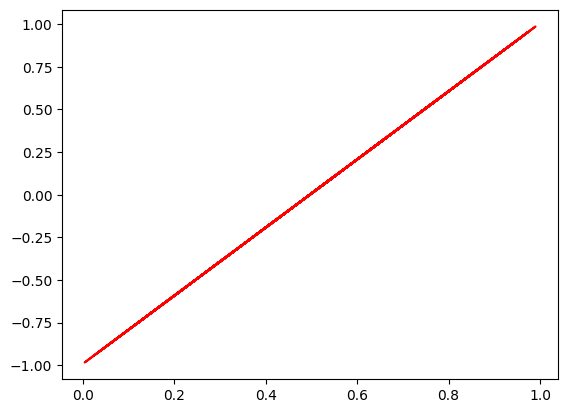

In [17]:
# Visualize data
plt.plot(inputs, outputs, 'r')
plt.show()
